In [1]:
from sklearn.model_selection import cross_val_score
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import ExtraTreesClassifier
>>> from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nurse_df = pd.read_csv('../output_data/model_data.csv')
nurse_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade,GradePass,HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0


In [3]:
X = nurse_df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)",
        "HighSchool", "Assoc","Bach","Masters"]]

In [4]:
nurses_df = nurse_df.drop(['PrecEducDesc', 'Grade'], axis=1)
nurses_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),GradePass,HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,1.0,0.0,1.0,0.0,0.0


In [5]:
nurses_df_pass = nurses_df[nurses_df["GradePass"]== 1]
len(nurses_df_pass)

898

In [6]:
nurses_df_fail = nurses_df[nurses_df["GradePass"] != 1]
len(nurses_df_fail)

327

In [7]:
new_data = pd.concat([nurses_df_fail ,nurses_df_pass.sample(n=len(nurses_df_fail)) ],copy=True,ignore_index=True)
len(new_data)

654

In [8]:
target = new_data["GradePass"]
target_names = ["negative", "positive"]

In [9]:
data = new_data.drop("GradePass", axis=1)
feature_names = data.columns
data.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),HighSchool,Assoc,Bach,Masters
0,3.29,2.0,77.3,0,60.00,591.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0,369.00,465.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0,116.00,591.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1,124.58,578.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0,158.00,460.0,1.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [11]:
rf = ExtraTreesClassifier(n_estimators=2000, max_depth=5)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7621951219512195

In [12]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.46447891313481604, 'Cum GPA'),
 (0.11503927037289784, 'TEAS Count'),
 (0.10784344488681381, 'MaxOfTestScore'),
 (0.09955686700276524, 'Completion Time (days)'),
 (0.09887544400481929, 'Time to Test (days)'),
 (0.0558226110345762, 'failing grade count'),
 (0.0316277701855264, 'Bach'),
 (0.015195927996527813, 'HighSchool'),
 (0.007234957182308124, 'Assoc'),
 (0.0043247941989491894, 'Masters')]

In [13]:
result = new_data.values
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10
0,3.29,2.0,77.3,0.0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0.0,369.00,465.0,0.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0.0,116.00,591.0,0.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1.0,124.58,578.0,0.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0.0,158.00,460.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
649,3.31,2.0,75.3,0.0,98.45,578.0,1.0,1.0,0.0,0.0,0.0
650,3.40,1.0,88.0,0.0,48.31,465.0,1.0,1.0,0.0,0.0,0.0
651,3.00,2.0,77.3,0.0,45.32,599.0,1.0,0.0,0.0,1.0,0.0
652,2.88,1.0,65.3,0.0,61.00,467.0,1.0,1.0,0.0,0.0,0.0


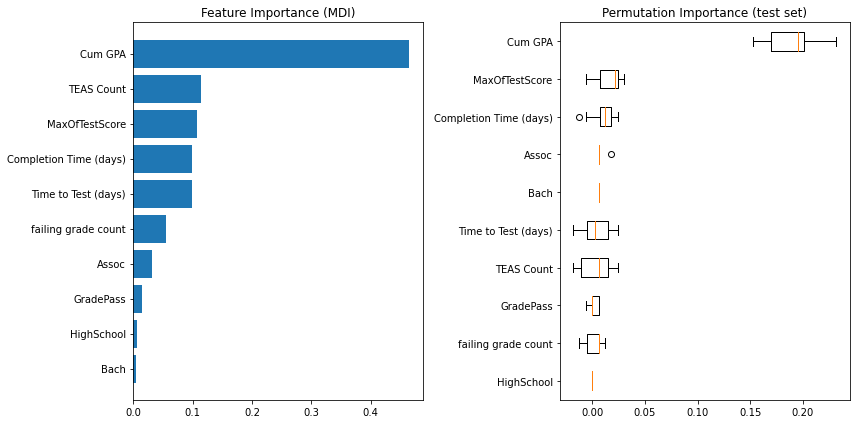

In [14]:
#plot feature importance

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, new_data.columns[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels= new_data.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [15]:
y_predict = rf.predict(X_test)
y_predict

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.])

In [16]:
y_test

444    1.0
358    1.0
217    0.0
72     0.0
256    0.0
      ... 
388    1.0
482    1.0
134    0.0
383    1.0
545    1.0
Name: GradePass, Length: 164, dtype: float64

In [17]:
 # Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        84
         1.0       0.79      0.70      0.74        80

    accuracy                           0.76       164
   macro avg       0.77      0.76      0.76       164
weighted avg       0.76      0.76      0.76       164

